# Atomic models

abTEM uses The Atomic Simulation Environment [(ASE)](https://wiki.fysik.dtu.dk/ase/) to create atomic models. ASE is a set of tools and Python modules for setting up, manipulating, visualizing and analyzing atomistic simulations. It is used in conjunction with other codes such as GPAW for running DFT simulations. Here we just introduce the features of ASE needed for image simulations, the ASE documentation provides a comprehensive introduction.

## Atoms
The Atoms object is a collection of atoms. Here is how to define a $\mathrm{N}_2$ molecule by directly specifying the position of two nitrogen atoms in units of Angstrom:

In [1]:
from ase import Atoms
n2 = Atoms('2N', positions=[(0., 0., 0.), (0., 0., 1.10)], cell=[2, 2, 2])

abTEM uses just the positional coordinates, atomic numbers and unit cell properties for creating electrostatic potentials.

In [2]:
n2.positions

array([[0. , 0. , 0. ],
       [0. , 0. , 1.1]])

In [3]:
n2.numbers

array([7, 7])

In [4]:
n2.cell.array

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

<div class= "alert alert-info">

**Note:**

abTEM assumes that imaging electrons propagate along the $z$-axis in the direction from negative to positive.
    
</div>

<div class= "alert alert-info">

**Note:**

abTEM requires orthogonal unit cells. It is not always trivial to create an orthognal unit cell given. Tools for helping with this is demonstrated in an advanced tutorial.

</div>

## Import

ASE can import all the common atomic structure formats, see a full list [here](https://wiki.fysik.dtu.dk/ase/ase/io/io.html). Below we import a `.cif`-file defining a unit cell of Strontium Titanate, SrTiO3.

In [5]:
from ase.io import read
srtio3 = read('srtio3.cif')

Simulations may require a larger crystal, to repeat the atoms by 2 in the $x$- and $y$-direction and 3 $z$-direction we can write:

In [6]:
srtio3 *= (2, 2, 3)

ASE has many tools for manipulating imported structures or procedurally generate structures. See the advanced tutorial.

## Visualize

The simplest way to visualize the atoms is the view() function:

In [7]:
from ase.visualize import view
view(srtio3)

The atomic structure can also visualized inline in a Jupyter Notebook using the `plot_atoms` function. This function shows a 2d projection of the structure perpendicular to the specified plane. For example:

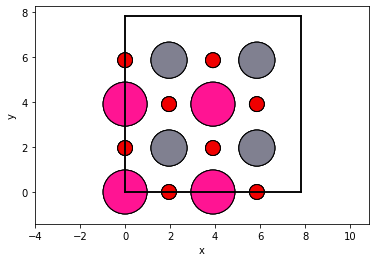

In [10]:
from abtem.plot import plot_atoms
plot_atoms(srtio3, plane='xy')